In [ ]:
import csv
import cv2
import pytesseract
from pytesseract import image_to_string
import pandas as pd
import re
import os
import numpy as np
from moviepy.video.io.VideoFileClip import VideoFileClip
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\ProgramData\anaconda3\Library\bin\tesseract.exe'
%run tokyo_olympic_data_helper.ipynb

In [ ]:
def save_data(row,fileName):
        # Check if the CSV file exists
    if not os.path.isfile(fileName+".csv"):
        # Create a new CSV file with headers if it doesn't exist
        df = pd.DataFrame(columns=['Sno','Match name','Name','Country','Difficulty','Dive Position','Somersaults', 'Dive Group', 'Twists','Score','Final Score'])
    else:
        # Read the existing CSV file into a DataFrame
        df = pd.read_csv(fileName+".csv")


    df = df.append(row, ignore_index=True)
    # Save the updated DataFrame to the CSV file
    df.to_csv(fileName+'.csv', index=False)



In [ ]:
def extract_from_video(filePath,videoName,template,templateRes):
        # Open the video using OpenCV

    desired_width = 1631
    desired_height = 907
    cap = cv2.VideoCapture(filePath)
    #,apiPreference=cv2.CAP_ANY,params=[
    #cv2.CAP_PROP_FRAME_WIDTH,desired_width ,
    #cv2.CAP_PROP_FRAME_HEIGHT, desired_height])

    #cap.set(cv2.CAP_PROP_FRAME_WIDTH, desired_width)
    #cap.set(cv2.CAP_PROP_FRAME_HEIGHT, desired_height)
    fps=cap.get(cv2.CAP_PROP_FPS)
    print(fps)
    minToSkip=9
    framesToSkip=fps*60*minToSkip
    framesToSkipEverySec=fps-1
    currentFrame=0
    currentFrameInSec=0
    diveStarted=False
    sno=1
    row=[]

    # Initialize a list to store the scores

    print("start")

    oldText="old"
    # Process each frame of the video
    while True:
        # Read the next frame
        ret, frame = cap.read()
        currentFrame+=1
        currentFrameInSec+=1
        if currentFrame<framesToSkip :
            if currentFrame%(fps*60)==0:
                print(currentFrame//(fps*60) ," min(s) Skipped")
            continue

        if currentFrameInSec<framesToSkipEverySec:
            continue



        # Break the loop if the video has ended
        if not ret:
            print("completed")
            break

        current_pos = cap.get(cv2.CAP_PROP_POS_MSEC)
        total_seconds = int(current_pos // 1000)
        minutes = total_seconds // 60
        seconds = total_seconds % 60
        timeInVideo =f"{minutes} minutes and {seconds} seconds"
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Use OCR to extract the text from the frame
        text = image_to_string(gray,lang="eng")

        words = text.lower().split()  # split the text into a list of words
        filtered_words = [word for word in words if (word != 'tokyo' and word!='2020' and word!='202' and word!='toky' and word!='tokyo2020' and word!="0ky0" and word!="toky0") ]  # use list comprehension to remove the word "hello"
        text = ' '.join(filtered_words)  # join the remaining words back into a string

        name=""
        round=""
        country=""
        difficulty=""
        divePosition=""
        somersaults=""
        diveGroup=""
        twists=""

        if not diveStarted and "round" in text.lower() and "difficulty" in text.lower() and "penalty" not in text.lower() and "position" in text.lower():
            diveStarted=True
            cropped=extract_frame(frame,template)
            plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
            round,country,name,difficulty,divePosition,somersaults,diveGroup,twists = extract_diveinfo(cropped)
            row = {'Sno':sno,'Match name':videoName,"Time":total_seconds,'Name':name.strip(),'Country':country.strip(),'Difficulty':difficulty,'Dive Position':divePosition,'Somersaults':somersaults,
        'Dive Group':diveGroup,
        'Twists':twists }
            print(timeInVideo," dive started")

        if diveStarted and( ("difficulty" in text.lower() and "penalty" in text.lower()) | ("penalty" in text.lower()) ):
            print(timeInVideo," dive scores announced")
            cropped=extract_frame(frame,templateRes)
            plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
            croppedText=extract_text(cropped)
            score=get_score(cropped)
            finalScore=extract_final_score(text)
            #print(finalScore,score)
            row['Score'] = score
            row['Final Score'] = finalScore
            extract_clip(filePath,'ExtractedVideos/'+str(sno)+'_'+videoName+'.mp4',int(row['Time']),int(total_seconds))
            diveStarted=False
            sno+=1
            print(row)
            save_data(row,"scores")



        currentFrameInSec=0
    cap.release()

25.0
start
1.0  min(s) Skipped
2.0  min(s) Skipped
3.0  min(s) Skipped
4.0  min(s) Skipped
5.0  min(s) Skipped
6.0  min(s) Skipped
7.0  min(s) Skipped
8.0  min(s) Skipped
9 minutes and 25 seconds  dive started
10 minutes and 13 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/1_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
565
613
Moviepy - Building video ExtractedVideos/1_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/1_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/1_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 1, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 565, 'Name': 'ANABELLE SMITH', 'Country': 'AUS', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([0.0, 78.0, 78.0, 7.0, 6.0, 70.0, 7.0], '0'), 'Final Score': '65.10'}
10 minutes and 24 seconds  dive started
11 minutes and 4 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/2_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
624
664
Moviepy - Building video ExtractedVideos/2_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/2_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/2_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 2, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 624, 'Name': 'ENOMOTO Haruka', 'Country': 'JPN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([65.0, 7.0, 6.0, 6.5, 0.0, 6.5, 6.5], '0'), 'Final Score': '58.50'}
11 minutes and 24 seconds  dive started
11 minutes and 55 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/3_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
684
715
Moviepy - Building video ExtractedVideos/3_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/3_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/3_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 3, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 684, 'Name': 'INce JANSEN', 'Country': 'NED', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([], '0'), 'Final Score': ''}
12 minutes and 21 seconds  dive started
12 minutes and 56 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/4_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
741
776
Moviepy - Building video ExtractedVideos/4_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/4_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/4_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 4, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 741, 'Name': 'Krysta PALMER', 'Country': 'USA', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([65.0], '0'), 'Final Score': '60.00'}
13 minutes and 17 seconds  dive started
13 minutes and 57 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/5_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
797
837
Moviepy - Building video ExtractedVideos/5_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/5_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/5_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 5, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 797, 'Name': 'Tina PUNZEL', 'Country': 'GER', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([1.0, 65.0, 70.0, 7.0, 7.0, 65.0, 65.0], '0'), 'Final Score': '61.50'}
14 minutes and 13 seconds  dive started
14 minutes and 45 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/6_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
853
885
Moviepy - Building video ExtractedVideos/6_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/6_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/6_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 6, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 853, 'Name': 'Mariia POLIAKOVA', 'Country': 'ROC', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([465.0, 5.0, 8.0, 6.5, 55.0, 7.0, 7.0], '0'), 'Final Score': '61.50'}
15 minutes and 11 seconds  dive started
15 minutes and 55 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/7_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
911
955
Moviepy - Building video ExtractedVideos/7_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/7_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/7_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 7, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 911, 'Name': 'Emma GULLSTRAND', 'Country': 'SWE', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([70.0, 60.0, 65.0, 60.0, 6.5, 6.0, 6.0], '0'), 'Final Score': '55.50'}
16 minutes and 17 seconds  dive started
16 minutes and 57 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/8_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
977
1017
Moviepy - Building video ExtractedVideos/8_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/8_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/8_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 8, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 977, 'Name': 'MicHeLLe HEIMBERG', 'Country': 'Sul', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([40.0, 6.0, 65.0, 6.0, 6.0, 65.0, 6.0], '0'), 'Final Score': '55.50'}
17 minutes and 16 seconds  dive started
17 minutes and 50 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/9_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1036
1070
Moviepy - Building video ExtractedVideos/9_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/9_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/9_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 9, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1036, 'Name': 'Nur DHaBITAH SABRI', 'Country': 'MAS', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([5.0, 0.0, 7.0, 7.0, 5.0, 7.0, 7.0], '0'), 'Final Score': '63.00'}
18 minutes and 19 seconds  dive started
19 minutes and 2 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/10_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1099
1142
Moviepy - Building video ExtractedVideos/10_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/10_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/10_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 10, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1099, 'Name': 'EstHER QIN', 'Country': 'AUS', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([88.0, 7.5, 80.0, 80.0, 75.0, 75.0, 7.5], '0'), 'Final Score': '69.00'}
19 minutes and 17 seconds  dive started
19 minutes and 55 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/11_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1157
1195
Moviepy - Building video ExtractedVideos/11_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/11_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/11_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 11, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1157, 'Name': 'Aranza VAZQUEZ MONTAN(', 'Country': 'MEX', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([88.0, 7.0, 0.0, 7.5, 7.5, 7.5], '0'), 'Final Score': '67.50'}
20 minutes and 11 seconds  dive started
20 minutes and 41 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/12_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1211
1241
Moviepy - Building video ExtractedVideos/12_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/12_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/12_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 12, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1211, 'Name': 'KIM Suii', 'Country': 'KOR', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([0.0, 5.0, 0.0, 7.0, 7.0, 7.0, 65.0], '0'), 'Final Score': '63.00'}
21 minutes and 2 seconds  dive started
21 minutes and 38 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/13_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1262
1298
Moviepy - Building video ExtractedVideos/13_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/13_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/13_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 13, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1262, 'Name': 'Haitey HERNANDEZ', 'Country': 'USA.', 'Difficulty': '2.7', 'Dive Position': 'TUCK', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([7.0, 65.0, 7.0, 465.0, 70.0, 7.0, 7.0], '0'), 'Final Score': '56.70'}
22 minutes and 1 seconds  dive started
22 minutes and 36 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/14_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1321
1356
Moviepy - Building video ExtractedVideos/14_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/14_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/14_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 14, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1321, 'Name': 'MIKAMI Savaka', 'Country': 'JPN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([5.0, 75.0, 7.5, 78.0, 8.0, 7.0, 7.0], '0'), 'Final Score': '64.50'}
23 minutes and 2 seconds  dive started
23 minutes and 43 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/15_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1382
1423
Moviepy - Building video ExtractedVideos/15_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/15_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/15_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 15, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1382, 'Name': 'Pamera WARE', 'Country': 'CAN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([5.0, 5.0, 7.5, 7.5, 488.0, 75.0, 80.0], '0'), 'Final Score': '67.50'}
24 minutes and 3 seconds  dive started
24 minutes and 38 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/16_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1443
1478
Moviepy - Building video ExtractedVideos/16_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/16_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/16_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 16, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1443, 'Name': 'JenniFEr ABEL', 'Country': 'CAN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([7.5, 80.0, 85.0, 7.0, 7.5, 7.5, 7.5], '0'), 'Final Score': '67.50'}
25 minutes and 4 seconds  dive started
25 minutes and 44 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/17_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1504
1544
Moviepy - Building video ExtractedVideos/17_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/17_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/17_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 17, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1504, 'Name': 'WANG Han', 'Country': 'CHN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([880.0, 80.0, 8.0, 75.0, 7.5, 8.0, 7.5], '0'), 'Final Score': '70.50'}
26 minutes and 4 seconds  dive started
26 minutes and 44 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/18_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1564
1604
Moviepy - Building video ExtractedVideos/18_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/18_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/18_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 18, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1564, 'Name': 'SHI Tinamao', 'Country': 'CHN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([88.0, 40.0, 70.0, 7.0, 7.0, 7.5, 7.5], '0'), 'Final Score': '64.50'}
27 minutes and 49 seconds  dive started
28 minutes and 31 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/19_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1669
1711
Moviepy - Building video ExtractedVideos/19_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/19_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/19_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 19, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1669, 'Name': 'ANABELLE SMITH', 'Country': 'AUS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([0.0, 6.5, 70.0, 7.0, 7.0, 7.0, 7.0], '0'), 'Final Score': '63.00'}
28 minutes and 40 seconds  dive started
29 minutes and 15 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/20_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1720
1755
Moviepy - Building video ExtractedVideos/20_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/20_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/20_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 20, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1720, 'Name': 'ENOMOTO Haruka', 'Country': 'JPN', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([0.0, 6.5, 60.0, 6.5, 65.0, 6.5, 6.0], '0'), 'Final Score': '17.40'}
29 minutes and 27 seconds  dive started
30 minutes and 1 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/21_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1767
1801
Moviepy - Building video ExtractedVideos/21_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/21_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/21_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 21, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1767, 'Name': 'INGe JANSEN', 'Country': 'NED', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([4.0, 5.0, 70.0, 7.0, 5.0, 7.0, 7.0], '0'), 'Final Score': '26.00'}
30 minutes and 25 seconds  dive started
31 minutes and 0 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/22_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1825
1860
Moviepy - Building video ExtractedVideos/22_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/22_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/22_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 22, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1825, 'Name': 'Krysta PALMER', 'Country': 'USA', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([50.0, 68.0, 60.0, 55.0, 60.0, 6.0, 65.0], '0'), 'Final Score': '54.00'}
31 minutes and 11 seconds  dive started
31 minutes and 50 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/23_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1871
1910
Moviepy - Building video ExtractedVideos/23_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/23_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/23_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 23, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1871, 'Name': 'Tina PUNZEL', 'Country': 'GER', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([7.0, 7.5, 465.0, 7.0, 7.0, 8.5, 6.5], '0'), 'Final Score': '63.55'}
32 minutes and 5 seconds  dive started
32 minutes and 38 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/24_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1925
1958
Moviepy - Building video ExtractedVideos/24_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/24_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/24_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 24, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1925, 'Name': 'Marna POLIAKOVA', 'Country': 'ROC', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([40.0, 5.5, 60.0, 6.0, 60.0, 6.0, 5.5], '0'), 'Final Score': '15.50'}
32 minutes and 50 seconds  dive started
33 minutes and 34 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/25_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
1970
2014
Moviepy - Building video ExtractedVideos/25_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/25_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/25_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 25, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 1970, 'Name': 'Emma GULLSTRAND', 'Country': 'SWE', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '3', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([4.5, 55.0, 50.0, 60.0, 55.0, 60.0, 55.0], '0'), 'Final Score': '51.15'}
33 minutes and 47 seconds  dive started
34 minutes and 30 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/26_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2027
2070
Moviepy - Building video ExtractedVideos/26_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/26_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/26_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 26, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2027, 'Name': 'MicHeLLe HEIMBERG', 'Country': 'Sul', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([40.0, 58.5, 60.0, 65.0, 85.0, 6.0, 6.0], '0'), 'Final Score': '54.00'}
34 minutes and 41 seconds  dive started
35 minutes and 16 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/27_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2081
2116
Moviepy - Building video ExtractedVideos/27_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/27_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/27_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 27, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2081, 'Name': 'Nur DHaBITAH SABRI', 'Country': 'MAS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([30.0, 7.0, 78.0, 7.0, 7.0, 65.0, 7.0], ''), 'Final Score': '65.10'}
35 minutes and 27 seconds  dive started
36 minutes and 9 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/28_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2127
2169
Moviepy - Building video ExtractedVideos/28_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/28_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/28_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 28, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2127, 'Name': 'EstHER QIN', 'Country': 'AUS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([35.0, 485.0, 5.5, 5.5, 55.0, 66.0, 450.0], '0'), 'Final Score': '20.15'}
36 minutes and 22 seconds  dive started
37 minutes and 2 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/29_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2182
2222
Moviepy - Building video ExtractedVideos/29_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/29_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/29_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 29, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2182, 'Name': 'Aranza VAZQUEZ MONTANC', 'Country': 'MEX', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([30.0, 970.0, 465.0, 7.0, 7.0, 7.0, 45.0], '0'), 'Final Score': '65.10'}
37 minutes and 11 seconds  dive started
37 minutes and 53 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/30_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2231
2273
Moviepy - Building video ExtractedVideos/30_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/30_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/30_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 30, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2231, 'Name': 'KIM Sun', 'Country': 'KOR', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([48.0, 45.0, 80.0, 45.0, 5.0, 5.0, 5.0], '0'), 'Final Score': '09.50'}
38 minutes and 2 seconds  dive started
38 minutes and 45 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/31_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2282
2325
Moviepy - Building video ExtractedVideos/31_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/31_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/31_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 31, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2282, 'Name': 'HaiLey HERNANDEZ', 'Country': 'USA', 'Difficulty': '2.8', 'Dive Position': 'TUCK', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([6.5, 80.0, 70.0, 60.0, 70.0, 6.5, 6.5], '0'), 'Final Score': ''}
38 minutes and 56 seconds  dive started
39 minutes and 42 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/32_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2336
2382
Moviepy - Building video ExtractedVideos/32_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/32_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/32_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 32, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2336, 'Name': '', 'Country': '[ 1PN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': None, 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([45.0, 7.5, 70.0, 7.5, 78.0, 7.5, 7.0], '0'), 'Final Score': '68.20'}
39 minutes and 55 seconds  dive started
40 minutes and 44 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/33_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2395
2444
Moviepy - Building video ExtractedVideos/33_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/33_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/33_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 33, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2395, 'Name': 'PameLa WARE', 'Country': 'CAN', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([70.0, 0.0, 7.0, 7.0, 85.0, 7.0, 7.0], '0'), 'Final Score': '65.10'}
40 minutes and 54 seconds  dive started
41 minutes and 40 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/34_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2454
2500
Moviepy - Building video ExtractedVideos/34_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/34_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/34_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 34, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2454, 'Name': 'JENNIFER ABEL', 'Country': 'CAN', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([80.0, 7.35, 80.0, 80.0, 80.0, 7.5, 8.0], '0'), 'Final Score': '74.40'}
41 minutes and 54 seconds  dive started
42 minutes and 38 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/35_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2514
2558
Moviepy - Building video ExtractedVideos/35_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/35_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/35_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 35, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2514, 'Name': 'WANG Han', 'Country': 'CHN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([380.0, 485.0, 80.0, 7.0, 80.0, 8.5, 80.0], ''), 'Final Score': '42.50'}
42 minutes and 56 seconds  dive started
43 minutes and 40 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/36_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2576
2620
Moviepy - Building video ExtractedVideos/36_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/36_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/36_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 36, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2576, 'Name': 'SHI TinagmAO', 'Country': 'CHN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([35.0, 9.5, 85.0, 80.0, 80.0, 85.0, 7.5], '0'), 'Final Score': '38.00'}
44 minutes and 38 seconds  dive started
45 minutes and 28 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/37_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2678
2728
Moviepy - Building video ExtractedVideos/37_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/37_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/37_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 37, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2678, 'Name': 'ANABELLE SMITH', 'Country': 'AUS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([4.5, 5.5, 5.5, 465.0, 7.0, 6.5, 6.5], '0'), 'Final Score': '55.50'}
45 minutes and 44 seconds  dive started
46 minutes and 19 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/38_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2744
2779
Moviepy - Building video ExtractedVideos/38_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/38_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/38_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 38, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2744, 'Name': 'ENOMOTO Haruka', 'Country': 'JPN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([40.0, 5.5, 30.0, 5.0, 80.0, 5.5, 5.0], '0'), 'Final Score': '46.50'}
46 minutes and 28 seconds  dive started
47 minutes and 3 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/39_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2788
2823
Moviepy - Building video ExtractedVideos/39_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/39_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/39_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 39, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2788, 'Name': 'INGe JANSEN', 'Country': 'NED', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([465.0, 2.0, 65.0, 6.5, 7.0, 6.5, 6.5], '0'), 'Final Score': '84.50'}
47 minutes and 18 seconds  dive started
48 minutes and 1 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/40_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2838
2881
Moviepy - Building video ExtractedVideos/40_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/40_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/40_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 40, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2838, 'Name': 'Krysta PALMER', 'Country': 'USA', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([7.0, 9.5, 75.0, 6.0, 8.0, 7.0, 6.5], '0'), 'Final Score': '61.50'}
48 minutes and 14 seconds  dive started
48 minutes and 51 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/41_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2894
2931
Moviepy - Building video ExtractedVideos/41_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/41_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/41_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 41, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2894, 'Name': 'Tina PUNZEL', 'Country': 'GER', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([70.0, 7.0, 70.0, 70.0, 7.0, 7.0, 7.0], '0'), 'Final Score': '63.00'}
49 minutes and 2 seconds  dive started
49 minutes and 35 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/42_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2942
2975
Moviepy - Building video ExtractedVideos/42_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/42_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/42_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 42, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2942, 'Name': 'Marna POLIAKOVA', 'Country': 'ROC', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([4.5, 465.0, 69.0, 535.0, 60.0, 65.0, 6.0], '0'), 'Final Score': '55.50'}
49 minutes and 46 seconds  dive started
50 minutes and 27 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/43_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
2986
3027
Moviepy - Building video ExtractedVideos/43_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/43_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/43_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 43, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 2986, 'Name': 'Emma GULLSTRAND', 'Country': 'SWE', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([6.0, 6.0, 60.0, 46.5, 45.5, 65.0, 55.0], '0'), 'Final Score': '60.65'}
50 minutes and 44 seconds  dive started
51 minutes and 34 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/44_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3044
3094
Moviepy - Building video ExtractedVideos/44_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/44_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/44_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 44, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3044, 'Name': 'MicHerLe HEIMBERG', 'Country': 'Sul', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([], '00'), 'Final Score': '55.80'}
51 minutes and 52 seconds  dive started
52 minutes and 33 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/45_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3112
3153
Moviepy - Building video ExtractedVideos/45_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/45_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/45_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 45, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3112, 'Name': 'Nur DHaBITAH SABRI', 'Country': 'MAS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([7.3, 7.0, 70.0, 7.0, 7.0, 7.5, 4685.0], '0'), 'Final Score': '63.00'}
52 minutes and 49 seconds  dive started
53 minutes and 26 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/46_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3169
3206
Moviepy - Building video ExtractedVideos/46_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/46_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/46_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 46, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3169, 'Name': 'EstHerR QIN', 'Country': 'AUS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([], '0'), 'Final Score': '58.50'}
53 minutes and 43 seconds  dive started
54 minutes and 23 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/47_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3223
3263
Moviepy - Building video ExtractedVideos/47_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/47_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/47_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 47, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3223, 'Name': 'Aranza VAZQUEZ MONTANC', 'Country': 'MEX;', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([70.0, 465.0, 7.1, 7.0, 485.0, 7.0, 65.0], '0'), 'Final Score': '61.50'}
54 minutes and 44 seconds  dive started
55 minutes and 23 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/48_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3284
3323
Moviepy - Building video ExtractedVideos/48_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/48_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/48_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 48, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3284, 'Name': 'KIM Sun', 'Country': 'KOR|', 'Difficulty': '2.8', 'Dive Position': 'TUCK', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([45.0, 65.0, 70.0, 6.5, 7.0, 7.0, 7.0], '0'), 'Final Score': '66.90'}
55 minutes and 38 seconds  dive started
56 minutes and 21 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/49_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3338
3381
Moviepy - Building video ExtractedVideos/49_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/49_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/49_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 49, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3338, 'Name': 'HaiLey HERNANDEZ', 'Country': 'USA', 'Difficulty': '2.8', 'Dive Position': 'TUCK', 'Somersaults': '22', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([0.0, 7.5, 3.0, 7.5, 7.5, 7.5], '00'), 'Final Score': '63.00'}
56 minutes and 34 seconds  dive started
57 minutes and 23 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/50_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3394
3443
Moviepy - Building video ExtractedVideos/50_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/50_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/50_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 50, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3394, 'Name': 'MIKAMI Sayaka', 'Country': 'JPN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([25.0, 15.0, 25.0, 20.0, 2.0, 20.0, 2.5], '0'), 'Final Score': '19.50'}
57 minutes and 41 seconds  dive started
58 minutes and 19 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/51_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3461
3499
Moviepy - Building video ExtractedVideos/51_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/51_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/51_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 51, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3461, 'Name': 'PameLa WARE', 'Country': 'CAN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([7.0, 3.0, 70.0, 7.0, 7.5, 7.5, 7.5], '0'), 'Final Score': '64.50'}
58 minutes and 31 seconds  dive started
59 minutes and 16 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/52_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3511
3556
Moviepy - Building video ExtractedVideos/52_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/52_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/52_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 52, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3511, 'Name': 'JENNIFER ABEL', 'Country': 'CAN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([40.0, 7.0, 70.0, 65.0, 65.0, 6.5, 7.0], '0'), 'Final Score': '60.00'}
59 minutes and 26 seconds  dive started
60 minutes and 17 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/53_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3566
3617
Moviepy - Building video ExtractedVideos/53_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/53_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/53_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 53, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3566, 'Name': 'WANG HanN', 'Country': 'CHN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([40.0, 480.0, 85.0, 85.0, 80.0, 685.0, 90.0], '0'), 'Final Score': '75.00'}
60 minutes and 27 seconds  dive started
61 minutes and 15 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/54_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3627
3675
Moviepy - Building video ExtractedVideos/54_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/54_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/54_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 54, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3627, 'Name': 'SHI TiNnagmAO', 'Country': 'CHN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([90.0, 85.0, 90.0, 86.0, 88.0, 95.0, 8.0], '0'), 'Final Score': '76.50'}
63 minutes and 9 seconds  dive started
64 minutes and 30 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/55_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3789
3870
Moviepy - Building video ExtractedVideos/55_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/55_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/55_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 55, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3789, 'Name': 'ANABELLE SMITH', 'Country': 'AUS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([5.0, 6.0, 65.0, 60.0, 80.0, 60.0, 65.0], '20'), 'Final Score': '22.60'}
64 minutes and 41 seconds  dive started
65 minutes and 18 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/56_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3881
3918
Moviepy - Building video ExtractedVideos/56_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/56_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/56_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 56, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3881, 'Name': 'ENOMOTO Haruka', 'Country': 'JPN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([40.0, 88.0, 40.0, 88.0, 35.0, 40.0, 40.0], '0'), 'Final Score': '99.90'}
65 minutes and 30 seconds  dive started
66 minutes and 10 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/57_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3930
3970
Moviepy - Building video ExtractedVideos/57_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/57_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/57_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 57, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3930, 'Name': 'INGe JANSEN', 'Country': 'NED', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([6.5, 60.0, 60.0, 6.5, 6.0, 6.5, 6.5], '0'), 'Final Score': '58.90'}
66 minutes and 20 seconds  dive started
67 minutes and 7 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/58_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
3980
4027
Moviepy - Building video ExtractedVideos/58_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/58_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/58_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 58, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 3980, 'Name': 'Krysta PALMER', 'Country': 'USA', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([75.0, 7.5, 75.0, 70.0, 7.5, 70.0, 7.5], '0'), 'Final Score': '45.25'}
67 minutes and 18 seconds  dive started
67 minutes and 52 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/59_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4038
4072
Moviepy - Building video ExtractedVideos/59_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/59_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/59_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 59, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4038, 'Name': 'Tina PUNZEL', 'Country': 'GER', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([7.0, 7.8, 485.0, 7.0, 7.0, 465.0, 7.0], '0'), 'Final Score': '51.05'}
68 minutes and 9 seconds  dive started
68 minutes and 40 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/60_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4089
4120
Moviepy - Building video ExtractedVideos/60_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/60_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/60_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 60, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4089, 'Name': 'Marna POLIAKOVA', 'Country': 'ROC', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([45.0, 5.5, 85.0, 6.5, 60.0, 6.0, 68.0], '0'), 'Final Score': '25.00'}
69 minutes and 9 seconds  dive started
69 minutes and 49 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/61_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4149
4189
Moviepy - Building video ExtractedVideos/61_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/61_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/61_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 61, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4149, 'Name': 'Emma GULLSTRAND', 'Country': 'SWE', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([465.0, 7.0, 65.0, 6.5, 40.0, 5.5, 6.5], '0'), 'Final Score': '19.15'}
70 minutes and 15 seconds  dive started
70 minutes and 53 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/62_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4215
4253
Moviepy - Building video ExtractedVideos/62_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/62_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/62_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 62, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4215, 'Name': 'MicHeLLe HEIMBERG', 'Country': 'Sul', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([65.0, 60.0, 970.0, 6686.0, 65.0, 60.0, 6.5], '00'), 'Final Score': '57.00'}
71 minutes and 4 seconds  dive started
71 minutes and 43 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/63_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4264
4303
Moviepy - Building video ExtractedVideos/63_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/63_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/63_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 63, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4264, 'Name': 'Nur DHasITAH SABRI', 'Country': 'MAS', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([50.0, 90.0, 7.0, 6.5, 7.0, 5.0, 7.0], '00'), 'Final Score': '63.00'}
71 minutes and 54 seconds  dive started
72 minutes and 38 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/64_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4314
4358
Moviepy - Building video ExtractedVideos/64_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/64_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/64_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 64, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4314, 'Name': 'EstHErR QIN', 'Country': 'AUS', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': 2.5, 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([75.0, 758.0, 70.0, 75.0, 758.0, 7.5, 70.0], ''), 'Final Score': '67.50'}
72 minutes and 48 seconds  dive started
73 minutes and 28 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/65_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4368
4408
Moviepy - Building video ExtractedVideos/65_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/65_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/65_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 65, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4368, 'Name': 'Aranza VAZQUEZ MONTANC', 'Country': 'MEX|', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([70.0, 75.0, 458.0, 7.0, 7.0, 7.0, 7.6], '0'), 'Final Score': '63.00'}
73 minutes and 43 seconds  dive started
74 minutes and 24 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/66_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4423
4464
Moviepy - Building video ExtractedVideos/66_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/66_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/66_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 66, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4423, 'Name': 'KIM Sun', 'Country': 'KOR', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([6.5, 70.0, 6.5, 460.0, 240.0, 60.0, 65.0], ''), 'Final Score': ''}
74 minutes and 35 seconds  dive started
75 minutes and 16 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/67_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4475
4516
Moviepy - Building video ExtractedVideos/67_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/67_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/67_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 67, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4475, 'Name': 'HaiLey HERNANDEZ', 'Country': 'USA', 'Difficulty': '2.8', 'Dive Position': 'TUCK', 'Somersaults': '22', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([78.0, 78.0, 70.0, 7.0, 75.0, 7.0, 7.0], ''), 'Final Score': '33.10'}
75 minutes and 34 seconds  dive started
76 minutes and 16 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/68_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4534
4576
Moviepy - Building video ExtractedVideos/68_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/68_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/68_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 68, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4534, 'Name': 'MIKAMI Sayaka', 'Country': 'JPN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([80.0, 75.0, 80.0, 75.0, 465.0, 7.0, 75.0], '0'), 'Final Score': '19.70'}
77 minutes and 41 seconds  dive started
78 minutes and 20 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/69_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4661
4700
Moviepy - Building video ExtractedVideos/69_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/69_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/69_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 69, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4661, 'Name': 'JENNIFER ABEL', 'Country': 'CAN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'BACK', 'Twists': None, 'Score': ([7.8, 7.0, 75.0, 7.0, 7.0, 6.5, 7.0], '0'), 'Final Score': '63.00'}
78 minutes and 30 seconds  dive started
79 minutes and 20 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/70_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4710
4760
Moviepy - Building video ExtractedVideos/70_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/70_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/70_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 70, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4710, 'Name': 'WANG Han', 'Country': 'CHN', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([6.0, 46.5, 85.0, 60.0, 55.0, 65.0, 5.0], '0'), 'Final Score': '74.85'}
79 minutes and 37 seconds  dive started
80 minutes and 33 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/71_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4777
4833
Moviepy - Building video ExtractedVideos/71_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/71_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/71_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 71, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4777, 'Name': 'SHI TiINnagmAO', 'Country': 'CHN', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '32', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([45.0, 2.0, 65.0, 80.0, 80.0, 7.5, 85.0], '0'), 'Final Score': '75.95'}
81 minutes and 26 seconds  dive started
82 minutes and 13 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/72_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4886
4933
Moviepy - Building video ExtractedVideos/72_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/72_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/72_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 72, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4886, 'Name': 'ANABELLE SMITH', 'Country': 'AUS', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([35.0, 75.0, 0.0, 0.0, 7.0, 7.0, 7.0], '0'), 'Final Score': '63.00'}
82 minutes and 28 seconds  dive started
83 minutes and 6 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/73_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
4948
4986
Moviepy - Building video ExtractedVideos/73_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/73_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/73_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 73, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 4948, 'Name': 'ENOMOTO HaRruka', 'Country': 'JPN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': 2.5, 'Dive Group': 'BACK', 'Twists': None, 'Score': ([45.0, 65.0, 60.0, 55.0, 60.0, 6.5, 6.0], '0'), 'Final Score': '55.50'}
83 minutes and 27 seconds  dive started
84 minutes and 4 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/74_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5007
5044
Moviepy - Building video ExtractedVideos/74_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/74_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/74_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 74, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5007, 'Name': 'INGe JANSEN', 'Country': 'NED', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([70.0, 460.0, 6.5, 40.0, 65.0, 65.0, 6.5], '0'), 'Final Score': '58.50'}
84 minutes and 20 seconds  dive started
85 minutes and 15 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/75_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5060
5115
Moviepy - Building video ExtractedVideos/75_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/75_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/75_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 75, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5060, 'Name': 'Krysta PALMER', 'Country': 'USA', 'Difficulty': '3.4', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '2', 'Score': ([70.0, 7.5, 70.0, 6.5, 465.0, 7.0, 7.0], '0'), 'Final Score': '71.40'}
85 minutes and 37 seconds  dive started
86 minutes and 14 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/76_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5137
5174
Moviepy - Building video ExtractedVideos/76_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/76_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/76_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 76, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5137, 'Name': 'Tina PUNZEL', 'Country': 'GER', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'INWARD', 'Twists': None, 'Score': ([70.0, 78.0, 8.0, 7.0, 65.0, 65.0, 6.5], ''), 'Final Score': '11.05'}
86 minutes and 24 seconds  dive started
86 minutes and 58 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/77_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5184
5218
Moviepy - Building video ExtractedVideos/77_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/77_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/77_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 77, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5184, 'Name': 'Marna POLIAKOVA', 'Country': 'ROC', 'Difficulty': '3.1', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'FORWARD', 'Twists': None, 'Score': ([70.0, 70.0, 78.0, 6.5, 7.0, 7.0, 7.0], '0'), 'Final Score': '65.10'}
87 minutes and 12 seconds  dive started
88 minutes and 4 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/78_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5232
5284
Moviepy - Building video ExtractedVideos/78_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/78_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/78_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 78, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5232, 'Name': 'Emma GULLSTRAND', 'Country': 'SWE', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'FORWARD', 'Twists': '2', 'Score': ([65.0, 0.0, 4.5, 6.5, 70.0, 7.0, 7.0], '0'), 'Final Score': '69.70'}
88 minutes and 19 seconds  dive started
89 minutes and 5 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/79_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5299
5345
Moviepy - Building video ExtractedVideos/79_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/79_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/79_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 79, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5299, 'Name': 'MicHeLLe HEIMBERG', 'Country': 'Sul', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '2', 'Dive Group': 'REVERSE', 'Twists': None, 'Score': ([5.0, 480.0, 9.5, 5.0, 75.0, 7.5, 7.5], '0'), 'Final Score': '89.80'}
89 minutes and 19 seconds  dive started
89 minutes and 54 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/80_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5359
5394
Moviepy - Building video ExtractedVideos/80_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/80_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/80_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 80, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5359, 'Name': 'Nur DHasITaH SABRI', 'Country': 'MAS', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([4.0, 70.0, 4.0, 6.5, 6.5, 6.5], '00'), 'Final Score': '58.50'}
90 minutes and 7 seconds  dive started
90 minutes and 50 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/81_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5407
5450
Moviepy - Building video ExtractedVideos/81_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/81_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/81_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 81, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5407, 'Name': 'EstHer QIN', 'Country': 'AUS', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([38.0, 78.0, 78.0, 70.0, 7.0, 7.0, 7.0], ''), 'Final Score': '63.00'}
90 minutes and 59 seconds  dive started
91 minutes and 44 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/82_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5459
5504
Moviepy - Building video ExtractedVideos/82_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/82_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/82_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 82, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5459, 'Name': 'Aranza VAZQUEZ MONTANC', 'Country': 'MEX;', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([45.0, 9.0, 45.0, 0.0, 6.5, 7.0, 7.0], ''), 'Final Score': ''}
92 minutes and 1 seconds  dive started
92 minutes and 33 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/83_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5521
5553
Moviepy - Building video ExtractedVideos/83_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/83_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/83_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 83, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5521, 'Name': 'KIM Sun', 'Country': 'KOR', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([358.0, 465.0, 4.0, 65.0, 65.0, 78.0, 6.5], '0'), 'Final Score': '58.50'}
92 minutes and 45 seconds  dive started
93 minutes and 26 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/84_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5565
5606
Moviepy - Building video ExtractedVideos/84_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/84_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/84_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 84, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5565, 'Name': 'HaiLey HERNANDEZ', 'Country': 'USA', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([4.0, 465.0, 6.5, 6.5, 65.0, 6.5], '0'), 'Final Score': '58.50'}
93 minutes and 39 seconds  dive started
94 minutes and 12 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/85_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5619
5652
Moviepy - Building video ExtractedVideos/85_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/85_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/85_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 85, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5619, 'Name': 'MIKAMI Sayaka', 'Country': 'JPN', 'Difficulty': '3.0', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([40.0, 465.0, 65.0, 80.0, 6.0, 6.0, 6.0], '0'), 'Final Score': '73.70'}
94 minutes and 26 seconds  dive started
95 minutes and 18 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/86_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5666
5718
Moviepy - Building video ExtractedVideos/86_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/86_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/86_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 86, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5666, 'Name': 'Pamera WARE', 'Country': 'CAN', 'Difficulty': '', 'Dive Position': 'FREE', 'Somersaults': None, 'Dive Group': 'REVERSE', 'Twists': 3.5, 'Score': ([90.0, 460.0, 0.0, 0.0, 0.0, 0.0, 60.0], '0'), 'Final Score': '45.10'}
95 minutes and 34 seconds  dive started
96 minutes and 12 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/87_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5734
5772
Moviepy - Building video ExtractedVideos/87_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/87_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/87_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 87, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5734, 'Name': 'JENNIFER ABEL', 'Country': 'CAN', 'Difficulty': '3.4', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '2', 'Score': ([70.0, 7.5, 7.5, 80.0, 7.5, 70.0, 7.5], '0'), 'Final Score': '76.50'}
96 minutes and 28 seconds  dive started
97 minutes and 5 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/88_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5788
5825
Moviepy - Building video ExtractedVideos/88_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/88_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/88_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 88, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5788, 'Name': 'WANG Han', 'Country': 'CHN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([490.0, 89.0, 80.0, 80.0, 80.0, 7.5, 8.0], ''), 'Final Score': '46.85'}
97 minutes and 24 seconds  dive started
98 minutes and 17 seconds  dive scores announced
DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
ExtractedVideos/89_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
5844
5897
Moviepy - Building video ExtractedVideos/89_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4.
Moviepy - Writing video ExtractedVideos/89_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4



Moviepy - Done !
Moviepy - video ready ExtractedVideos/89_Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4
{'Sno': 89, 'Match name': 'Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020', 'Time': 5844, 'Name': 'SHI TinamAO', 'Country': 'CHN', 'Difficulty': '', 'Dive Position': 'PIKE', 'Somersaults': '22', 'Dive Group': 'FORWARD', 'Twists': '1', 'Score': ([30.0, 90.0, 90.0, 89.0, 856.0, 85.0, 890.0], '0'), 'Final Score': '71.45'}
102 minutes and 4 seconds  dive started
completed


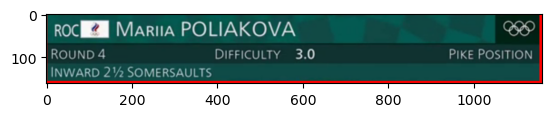

In [ ]:

templateTokyo = cv2.imread('HelperImages/template_tokyo.jpg', cv2.IMREAD_GRAYSCALE)
templateResTokyo = cv2.imread('HelperImages/template_res_tokyo.png', cv2.IMREAD_GRAYSCALE)
filePath="DownloadedVideos/Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020.mp4"
videoName="Women_ 3m_Springboard_Semi-Final_Diving_Tokyo2020"
extract_from_video(filePath,videoName,templateTokyo,templateResTokyo)